In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.integrate import quad

In [2]:
omega = [0.3,1.3]
theta = sorted([random.uniform(0, 2*np.pi) for i in range(100)])
omega_r = 8*10**(-5)
omega_m = 0.3
omega_Lmbda = 0.7
H_0 = 13.97*10**(9)


In [13]:
def a1(x, y):
    return (x/2*(x - 1))*(1 - np.cos(y))

In [14]:
def t1(x,y):
    return (x/2*(x- 1))*(y/np.sqrt(x - 1) - np.sin(y)/np.sqrt(x - 1))

In [15]:
def a_1(x, y):
    return (x/2*(1 - x))*(np.cosh(y) - 1)

In [16]:
def t_1(x, y):
    return (x/2*(1 - x))*(np.sinh(y)/np.sqrt(1 - x) - y/np.sqrt(1 - x))

In [17]:
def a0(x):
    return x**(2/3)

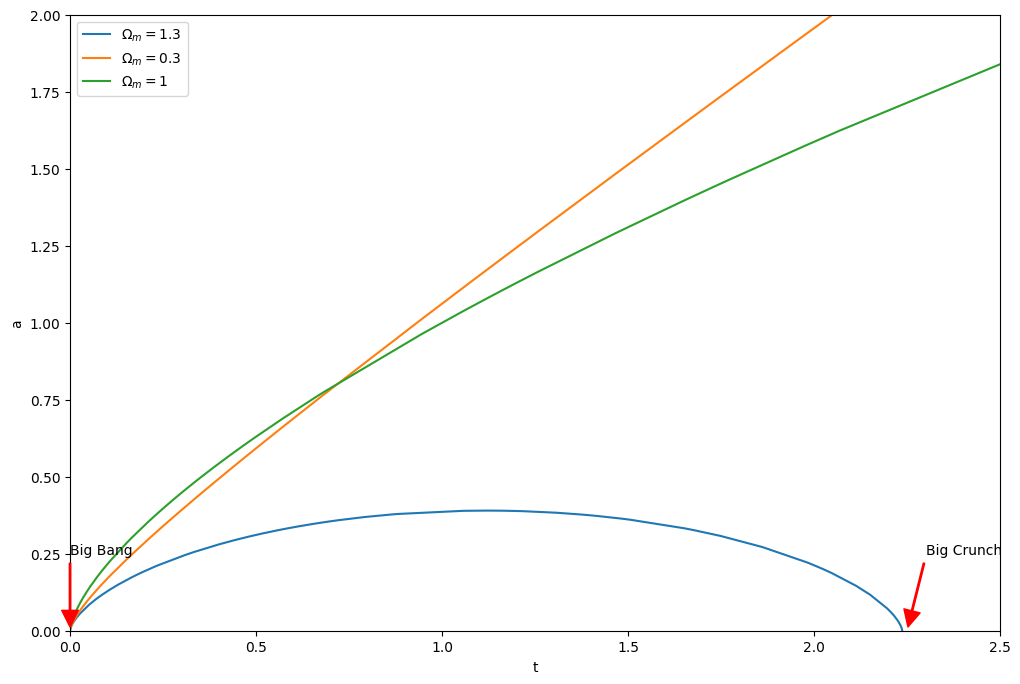

In [37]:
plt.figure(figsize = (12,8))
plt.plot(t1(omega[1], theta),a1(omega[1], theta))
plt.plot(t_1(omega[0], theta),a_1(omega[0], theta))
plt.plot(t_1(omega[0], theta),a0(t_1(omega[0], theta)))
plt.annotate('Big Crunch', xy=(2.25, 0),  xycoords='data',
            xytext=(2.3, 0.25),
            arrowprops=dict(color='red', shrink=0.05, width=1))
plt.annotate('Big Bang', xy=(0, 0),  xycoords='data',
            xytext=(0, 0.25),
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.xlim(0,2.5)
plt.ylim(0,2)
plt.legend(['$\Omega_{m} = 1.3$', '$\Omega_{m} = 0.3$', '$\Omega_{m} = 1$'])
plt.ylabel('a')
plt.xlabel('t')
plt.show()

d)

In [8]:
def Hubble(a):
    return np.sqrt(omega_r*a**(-4)+ omega_m*a**(-3) + omega_Lmbda)

In [12]:
def t_of_a(a):
    res = np.zeros_like(a)
    for i, ai in enumerate(a):
        t, err = quad(lambda ap: 1.0/(ap*Hubble(ap)), 0, ai)
        res[i] = t
    return res

In [10]:
a = np.logspace(-8, 1, 100)

Text(0, 0.5, 'a')

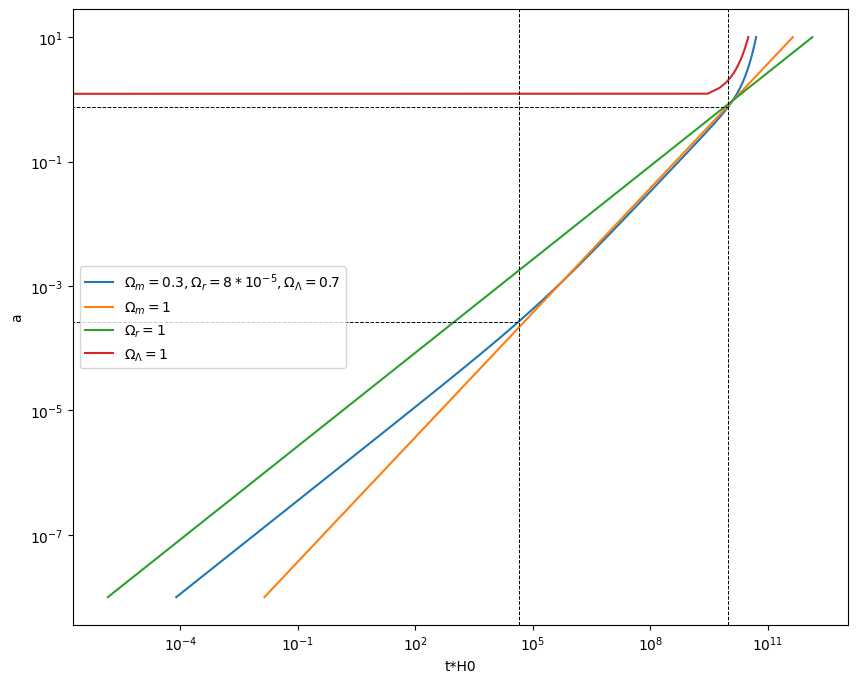

In [60]:
plt.figure(figsize = (10, 8))
plt.loglog(t_of_a(a)*H_0, a)
plt.loglog((a**(3/2))*H_0, a)
plt.loglog((a**(2))*H_0, a)
plt.loglog((np.log(a))*H_0, a)
plt.legend(['$\Omega_{m} = 0.3, \Omega_{r} = 8*10^{-5}, \Omega_{\Lambda} = 0.7$', '$\Omega_{m} = 1$', '$\Omega_{r} = 1$', '$\Omega_{\Lambda} = 1$'])
plt.axvline(x = 4.5*10**4, color = 'k', label = 'axvline - full height', linestyle = '--', linewidth = 0.7)
plt.hlines(y = 2.6*10**(-4),xmin = 0, xmax=  4.5*10**4, color = 'k', linestyle = '--', linewidth = 0.7)
plt.axvline(x = 10**10, color = 'k', label = 'axvline - full height', linestyle = '--', linewidth = 0.7)
plt.hlines(y = 0.75, xmin = 0, xmax = 10**10, color = 'k', linestyle = '--', linewidth = 0.7)

plt.xlabel('t*H0')
plt.ylabel('a')